In [1]:
import pandas as pd
from diodem.utils import resample, crop_tail
import imt
import matplotlib.pyplot as plt
import numpy as np
import tree

In [2]:
acc1 = pd.read_csv("data/knee_tracking1/femur.csv", sep=",", skiprows=11)[["Acc_X", "Acc_Y", "Acc_Z"]].to_numpy()
gyr1 = pd.read_csv("data/knee_tracking1/femur.csv", sep=",", skiprows=11)[["Gyr_X", "Gyr_Y", "Gyr_Z"]].to_numpy()
mag1 = pd.read_csv("data/knee_tracking1/femur.csv", sep=",", skiprows=11)[["Mag_X", "Mag_Y", "Mag_Z"]].to_numpy()
acc2 = pd.read_csv("data/knee_tracking1/tibia.csv", sep=",", skiprows=11)[["Acc_X", "Acc_Y", "Acc_Z"]].to_numpy()
gyr2 = pd.read_csv("data/knee_tracking1/tibia.csv", sep=",", skiprows=11)[["Gyr_X", "Gyr_Y", "Gyr_Z"]].to_numpy()
mag2 = pd.read_csv("data/knee_tracking1/tibia.csv", sep=",", skiprows=11)[["Mag_X", "Mag_Y", "Mag_Z"]].to_numpy()

acc1, gyr1, mag1, acc2, gyr2, mag2 = crop_tail((acc1, gyr1, mag1, acc2, gyr2, mag2), 60)
acc1, gyr1, mag1, acc2, gyr2, mag2 = resample((acc1, gyr1, mag1, acc2, gyr2, mag2), 60, 100)
gyr1, gyr2 = np.deg2rad(gyr1), np.deg2rad(gyr2)

`crop_tail`: Crop off at t=54.36666666666667s


In [3]:
solver = imt.Solver([-1, 0], [imt.methods.VQF(offline=True), imt.wrappers.JointTracker1D(imt.wrappers.JointPosition(imt.methods.RNNO(), dof_is_1d=True))], 0.01)
qhat, extras = solver.step({
    0: dict(acc=acc1, gyr=gyr1), 1: dict(acc=acc2, gyr=gyr2)
})

Text(0.5, 0, 'Time [s]')

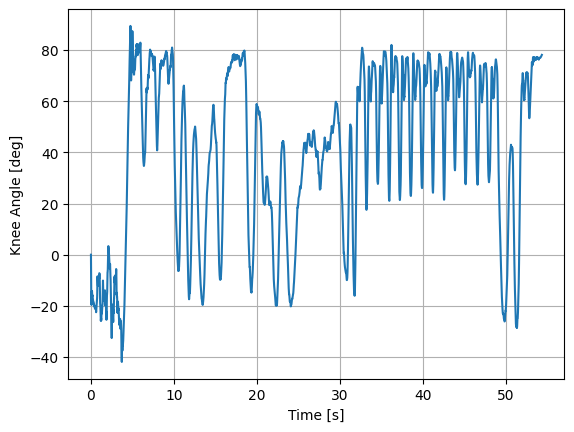

In [4]:
T = qhat[0].shape[0]
ts = np.arange(T)*0.01
plt.plot(ts, np.rad2deg(extras[1]["joint_angle_rad"]))
plt.grid()
plt.ylabel("Knee Angle [deg]")
plt.xlabel("Time [s]")

To save the video permanently, provide the path to where the .mp4 is  saved by specifying `offscreen_mode_options=dict(output_path=...)`



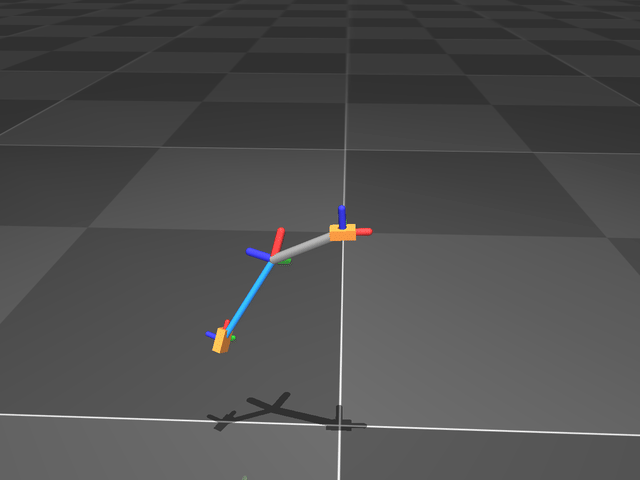

In [ ]:
pos = np.zeros((1000, 3))
pos[:, 2] = 0.5
# show only the first 10 seconds
qhat_first_10_seconds = tree.map_structure(lambda a: a[:1000], qhat)
imt.utils.view([-1, 0], qhat_first_10_seconds, extras, 100, global_translation=pos, mode="offscreen", show_floor=True,
               width=640, height=480, offscreen_mode_options=dict(camid=1, github=True), show_every_nth_frame=5)